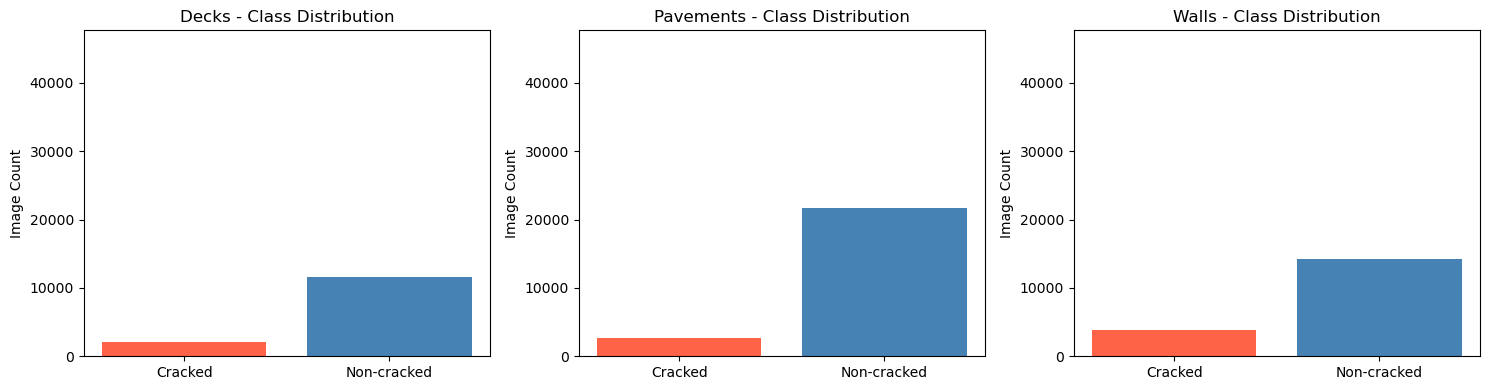

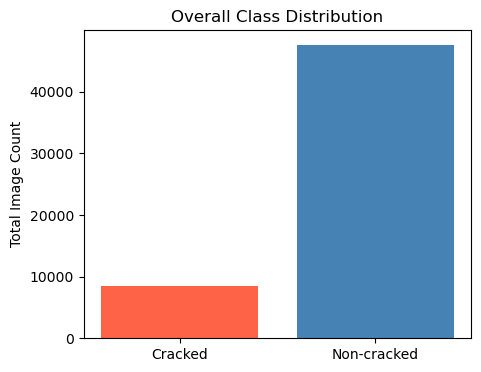

In [4]:
import os
import matplotlib.pyplot as plt

# Define dataset root path
dataset_path = './Dataset'  # Replace with actual path to SDNET2018

# Structure categories
categories = ['Decks', 'Pavements', 'Walls']
classes = ['Cracked', 'Non-cracked']

# Store counts
distribution = {cat: {cls: 0 for cls in classes} for cat in categories}
overall = {'Cracked': 0, 'Non-cracked': 0}

# Count images in each folder
for category in categories:
    for cls in classes:
        folder_path = os.path.join(dataset_path, category, cls)
        count = len(os.listdir(folder_path))
        distribution[category][cls] = count
        overall[cls] += count

# --- Plotting by category ---
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for idx, category in enumerate(categories):
    axs[idx].bar(distribution[category].keys(), distribution[category].values(), color=['tomato', 'steelblue'])
    axs[idx].set_title(f'{category} - Class Distribution')
    axs[idx].set_ylabel('Image Count')
    axs[idx].set_ylim(0, max(max(overall.values()), 1) + 100)

plt.tight_layout()
plt.show()

# --- Plotting overall distribution ---
plt.figure(figsize=(5, 4))
plt.bar(overall.keys(), overall.values(), color=['tomato', 'steelblue'])
plt.title('Overall Class Distribution')
plt.ylabel('Total Image Count')
plt.show()


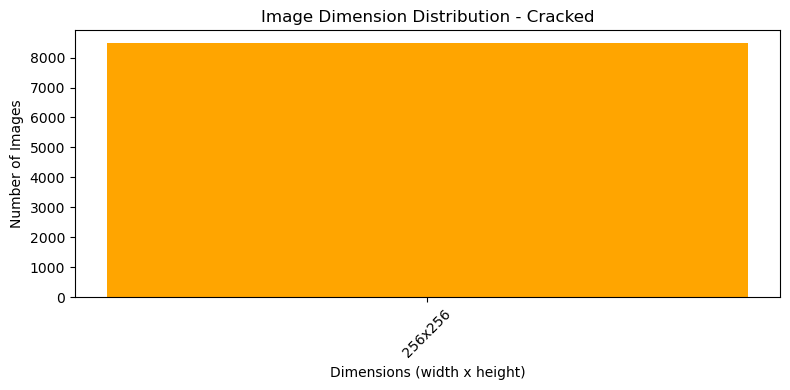

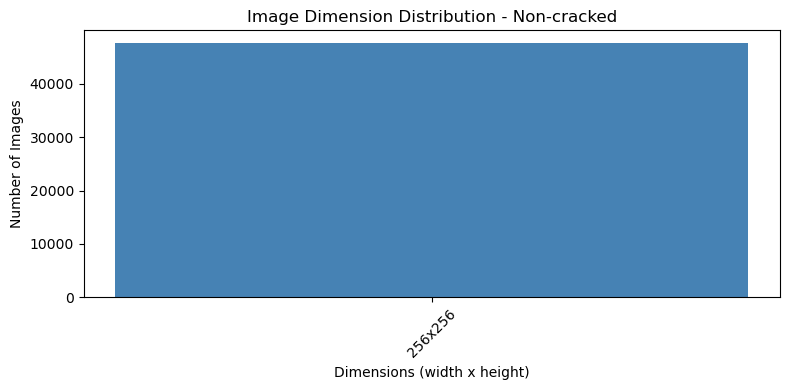

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize dictionaries to store dimension counts
dimension_counts = {
    'Cracked': defaultdict(int),
    'Non-cracked': defaultdict(int)
}

# Loop through each category and class
for category in categories:
    for cls in classes:
        folder_path = os.path.join(dataset_path, category, cls)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                with Image.open(file_path) as img:
                    dimensions = img.size  # (width, height)
                    dimension_counts[cls][dimensions] += 1
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Plot the results
for cls in classes:
    dims = list(dimension_counts[cls].keys())
    counts = list(dimension_counts[cls].values())
    dim_labels = [f'{w}x{h}' for (w, h) in dims]

    plt.figure(figsize=(8, 4))
    plt.bar(dim_labels, counts, color='orange' if cls == 'Cracked' else 'steelblue')
    plt.title(f'Image Dimension Distribution - {cls}')
    plt.xlabel('Dimensions (width x height)')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


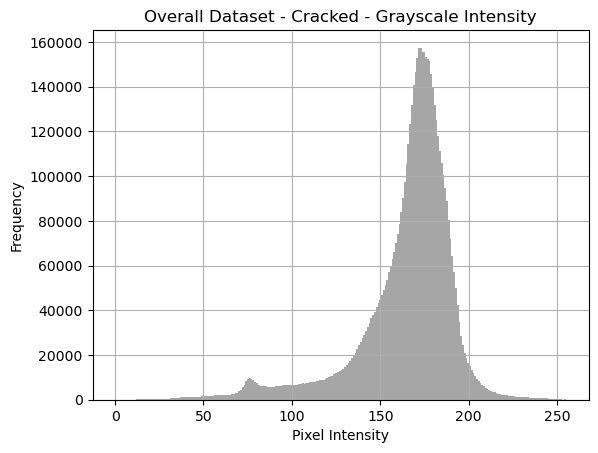

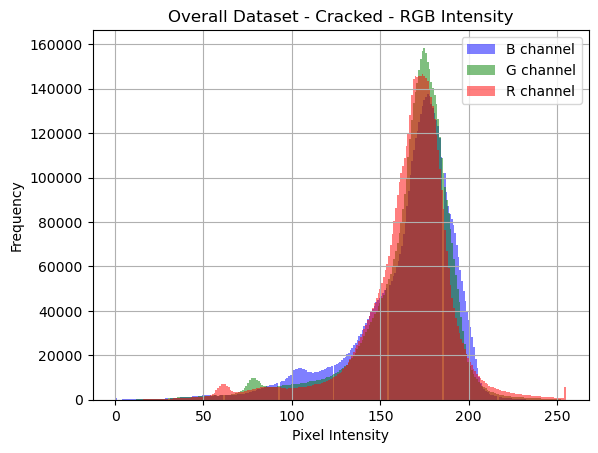

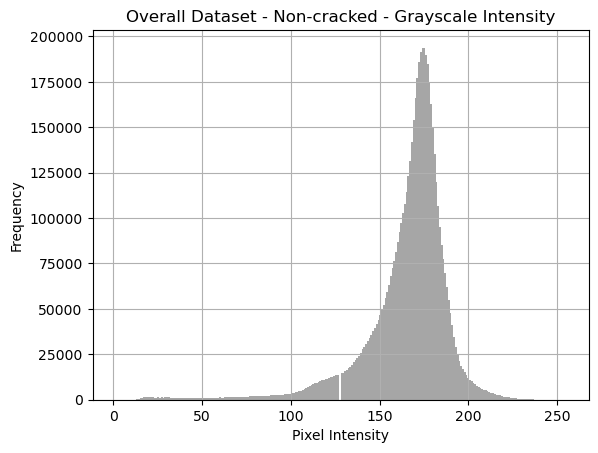

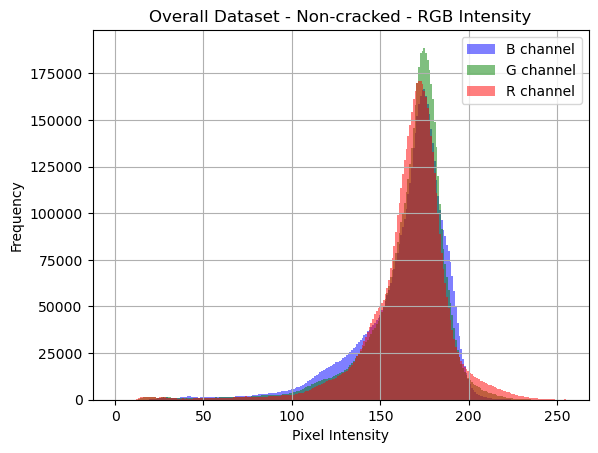

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

sample_size = 30  

def collect_image_paths():
    image_paths = {'Cracked': [], 'Non-cracked': []}
    for category in categories:
        for cls in classes:
            folder = os.path.join(dataset_path, category, cls)
            files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.jpg')]
            sampled = random.sample(files, min(sample_size, len(files)))
            image_paths[cls].extend(sampled)
    return image_paths

def plot_histogram(image_paths, cls_label, color_mode='grayscale'):
    all_pixels = []

    for path in image_paths:
        if color_mode == 'grayscale':
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        else:
            img = cv2.imread(path)  # BGR
        if img is not None:
            all_pixels.append(img)

    if color_mode == 'grayscale':
        pixel_values = np.concatenate([img.flatten() for img in all_pixels])
        plt.hist(pixel_values, bins=256, color='gray', alpha=0.7)
        plt.title(f"{cls_label} - Grayscale Intensity")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

    elif color_mode == 'rgb':
        color_map = ('b', 'g', 'r')
        for i, col in enumerate(color_map):
            pixel_values = np.concatenate([img[:, :, i].flatten() for img in all_pixels])
            plt.hist(pixel_values, bins=256, color=col, alpha=0.5, label=f'{col.upper()} channel')
        plt.title(f"{cls_label} - RGB Intensity")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True)
        plt.show()

# Collect paths from all categories
all_image_paths = collect_image_paths()

# Plot for each class
for cls in classes:
    plot_histogram(all_image_paths[cls], f"Overall Dataset - {cls}", color_mode='grayscale')
    plot_histogram(all_image_paths[cls], f"Overall Dataset - {cls}", color_mode='rgb')
